In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pickle
import math
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import time

In [2]:
pickle_in=open("DogCatX.pickle",'rb')
DogCatX=pickle.load(pickle_in)
pickle_in.close()
pickle_in=open('DogCaty.pickle','rb')
DogCaty=pickle.load(pickle_in)
pickle_in.close()

In [3]:
DogCatX=np.reshape(DogCatX,(24946,2500))
DogCatX,DogCaty=shuffle(DogCatX,DogCaty,random_state=0)
X_train,X_test,y_train,y_test=train_test_split(DogCatX,DogCaty,random_state=5,test_size=0.25)

In [4]:
time_start=time.clock()
classifier=XGBClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(np.array(X_test)
                        )
time_eclapsed=time.clock()-time_start

In [5]:
accuracy_score(y_test,y_pred)

0.634760301426968

In [10]:
train_size=list(range(2,11,2))
train_size[:]=[x/10 for x in train_size]
errorate_train=[]
errorate_test=[]
learn_time=[]
for n in train_size:
    X_train,y_train=shuffle(X_train,y_train,random_state=0)
    X_train_sub=X_train[:int(len(X_train)*n)]
    y_train_sub=y_train[:int(len(y_train)*n)]
    time_start=time.clock()
    classifier=XGBClassifier()
    classifier.fit(X_train_sub,y_train_sub)    
    errorate_train.append(1-accuracy_score(y_train_sub,classifier.predict(X_train_sub)))
    errorate_test.append(1-accuracy_score(y_test,classifier.predict(X_test)))  
    learn_time.append(time.clock()-time_start)


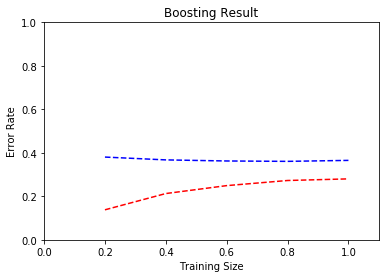

In [11]:
plt.plot(train_size,errorate_train,'r--',train_size,errorate_test,'b--')
plt.axis([0,1.1,0,1])
plt.ylabel('Error Rate')
plt.xlabel('Training Size')
plt.title('Boosting Result')
plt.savefig('E:/Machine Learning/HW1/DogCat/DogCat_Boosting_Error.png')


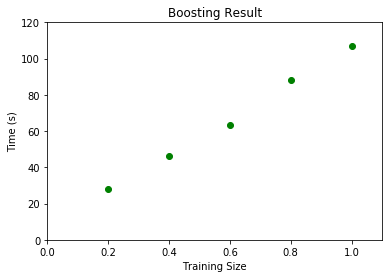

In [14]:
plt.plot(train_size,learn_time,'go')
plt.axis([0,1.1,0,120])
plt.ylabel('Time (s)')
plt.xlabel('Training Size')
plt.title('Boosting Result')
plt.savefig('E:/Machine Learning/HW1/DogCat/DogCat_Boosting_T.png')

In [13]:
errorate_test

[0.3804713804713805,
 0.3674843674843675,
 0.36251402918069586,
 0.3607503607503607,
 0.36523969857303196]

In [15]:
from sklearn.model_selection import RandomizedSearchCV

In [17]:
param_dist={ 
            'max_depth':[5,6,7,8,9],
            'subsample':[0.5,0.75,1],
            'objective':['reg:linear','reg:logistic']
}
boosting=XGBClassifier()
boosting_cv=RandomizedSearchCV(boosting,param_dist,cv=5)

In [ ]:
boosting_cv.fit(X_train,y_train)